# Central Limit Theorem Demonstration

## Theoretical Foundation

The **Central Limit Theorem (CLT)** is one of the most fundamental results in probability theory and statistics. It establishes that the distribution of sample means approaches a normal distribution as the sample size increases, regardless of the underlying population distribution.

### Formal Statement

Let $X_1, X_2, \ldots, X_n$ be a sequence of independent and identically distributed (i.i.d.) random variables with:
- Expected value: $\mathbb{E}[X_i] = \mu$
- Variance: $\text{Var}(X_i) = \sigma^2 < \infty$

Define the sample mean as:
$$\bar{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i$$

Then the standardized sample mean converges in distribution to a standard normal:
$$Z_n = \frac{\bar{X}_n - \mu}{\sigma / \sqrt{n}} \xrightarrow{d} \mathcal{N}(0, 1) \quad \text{as } n \to \infty$$

Equivalently, for large $n$:
$$\bar{X}_n \sim \mathcal{N}\left(\mu, \frac{\sigma^2}{n}\right)$$

### Key Implications

1. **Universality**: The CLT holds for any distribution with finite mean and variance
2. **Convergence Rate**: The approximation improves as $\mathcal{O}(1/\sqrt{n})$
3. **Practical Rule**: $n \geq 30$ is often sufficient for reasonable approximation

### Mathematical Intuition

The CLT can be understood through characteristic functions. If $\phi_X(t)$ is the characteristic function of $X$, then:
$$\phi_{Z_n}(t) = \left[\phi_X\left(\frac{t}{\sigma\sqrt{n}}\right) e^{-it\mu/(\sigma\sqrt{n})}\right]^n \to e^{-t^2/2}$$

The right-hand side is the characteristic function of $\mathcal{N}(0,1)$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import factorial

# Set random seed for reproducibility
np.random.seed(42)

# Configure matplotlib for publication-quality figures
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 11,
    'axes.titlesize': 12,
    'legend.fontsize': 9,
    'figure.figsize': (12, 10),
    'figure.dpi': 100
})

## Experimental Design

We will demonstrate the CLT using three distinctly non-normal distributions:

1. **Uniform Distribution**: $X \sim \text{Uniform}(0, 1)$
   - $\mu = 0.5$, $\sigma^2 = 1/12$

2. **Exponential Distribution**: $X \sim \text{Exp}(\lambda = 1)$
   - $\mu = 1$, $\sigma^2 = 1$

3. **Poisson Distribution**: $X \sim \text{Poisson}(\lambda = 3)$
   - $\mu = 3$, $\sigma^2 = 3$

For each distribution, we compute sample means for various sample sizes $n \in \{1, 5, 30, 100\}$ and compare the resulting distributions to the theoretical normal.

In [2]:
def demonstrate_clt(distribution_name, sample_generator, mu, sigma, sample_sizes, n_experiments=10000):
    """
    Demonstrate CLT for a given distribution.
    
    Parameters:
    -----------
    distribution_name : str
        Name of the distribution for labeling
    sample_generator : callable
        Function that generates samples of size n
    mu : float
        True population mean
    sigma : float
        True population standard deviation
    sample_sizes : list
        List of sample sizes to test
    n_experiments : int
        Number of sample means to compute
    
    Returns:
    --------
    dict : Dictionary containing sample means for each sample size
    """
    results = {}
    
    for n in sample_sizes:
        # Generate n_experiments samples, each of size n
        samples = sample_generator(size=(n_experiments, n))
        # Compute sample means
        sample_means = np.mean(samples, axis=1)
        # Standardize
        standardized = (sample_means - mu) / (sigma / np.sqrt(n))
        results[n] = {
            'means': sample_means,
            'standardized': standardized
        }
    
    return results

In [3]:
# Define distributions and their parameters
distributions = {
    'Uniform(0, 1)': {
        'generator': lambda size: np.random.uniform(0, 1, size),
        'mu': 0.5,
        'sigma': np.sqrt(1/12)
    },
    'Exponential(λ=1)': {
        'generator': lambda size: np.random.exponential(1, size),
        'mu': 1.0,
        'sigma': 1.0
    },
    'Poisson(λ=3)': {
        'generator': lambda size: np.random.poisson(3, size),
        'mu': 3.0,
        'sigma': np.sqrt(3)
    }
}

sample_sizes = [1, 5, 30, 100]
n_experiments = 10000

# Run experiments
all_results = {}
for name, params in distributions.items():
    all_results[name] = demonstrate_clt(
        name,
        params['generator'],
        params['mu'],
        params['sigma'],
        sample_sizes,
        n_experiments
    )
    print(f"Completed experiments for {name}")

Completed experiments for Uniform(0, 1)
Completed experiments for Exponential(λ=1)
Completed experiments for Poisson(λ=3)


## Visualization and Analysis

We now visualize how the distribution of standardized sample means converges to the standard normal $\mathcal{N}(0, 1)$ as $n$ increases.

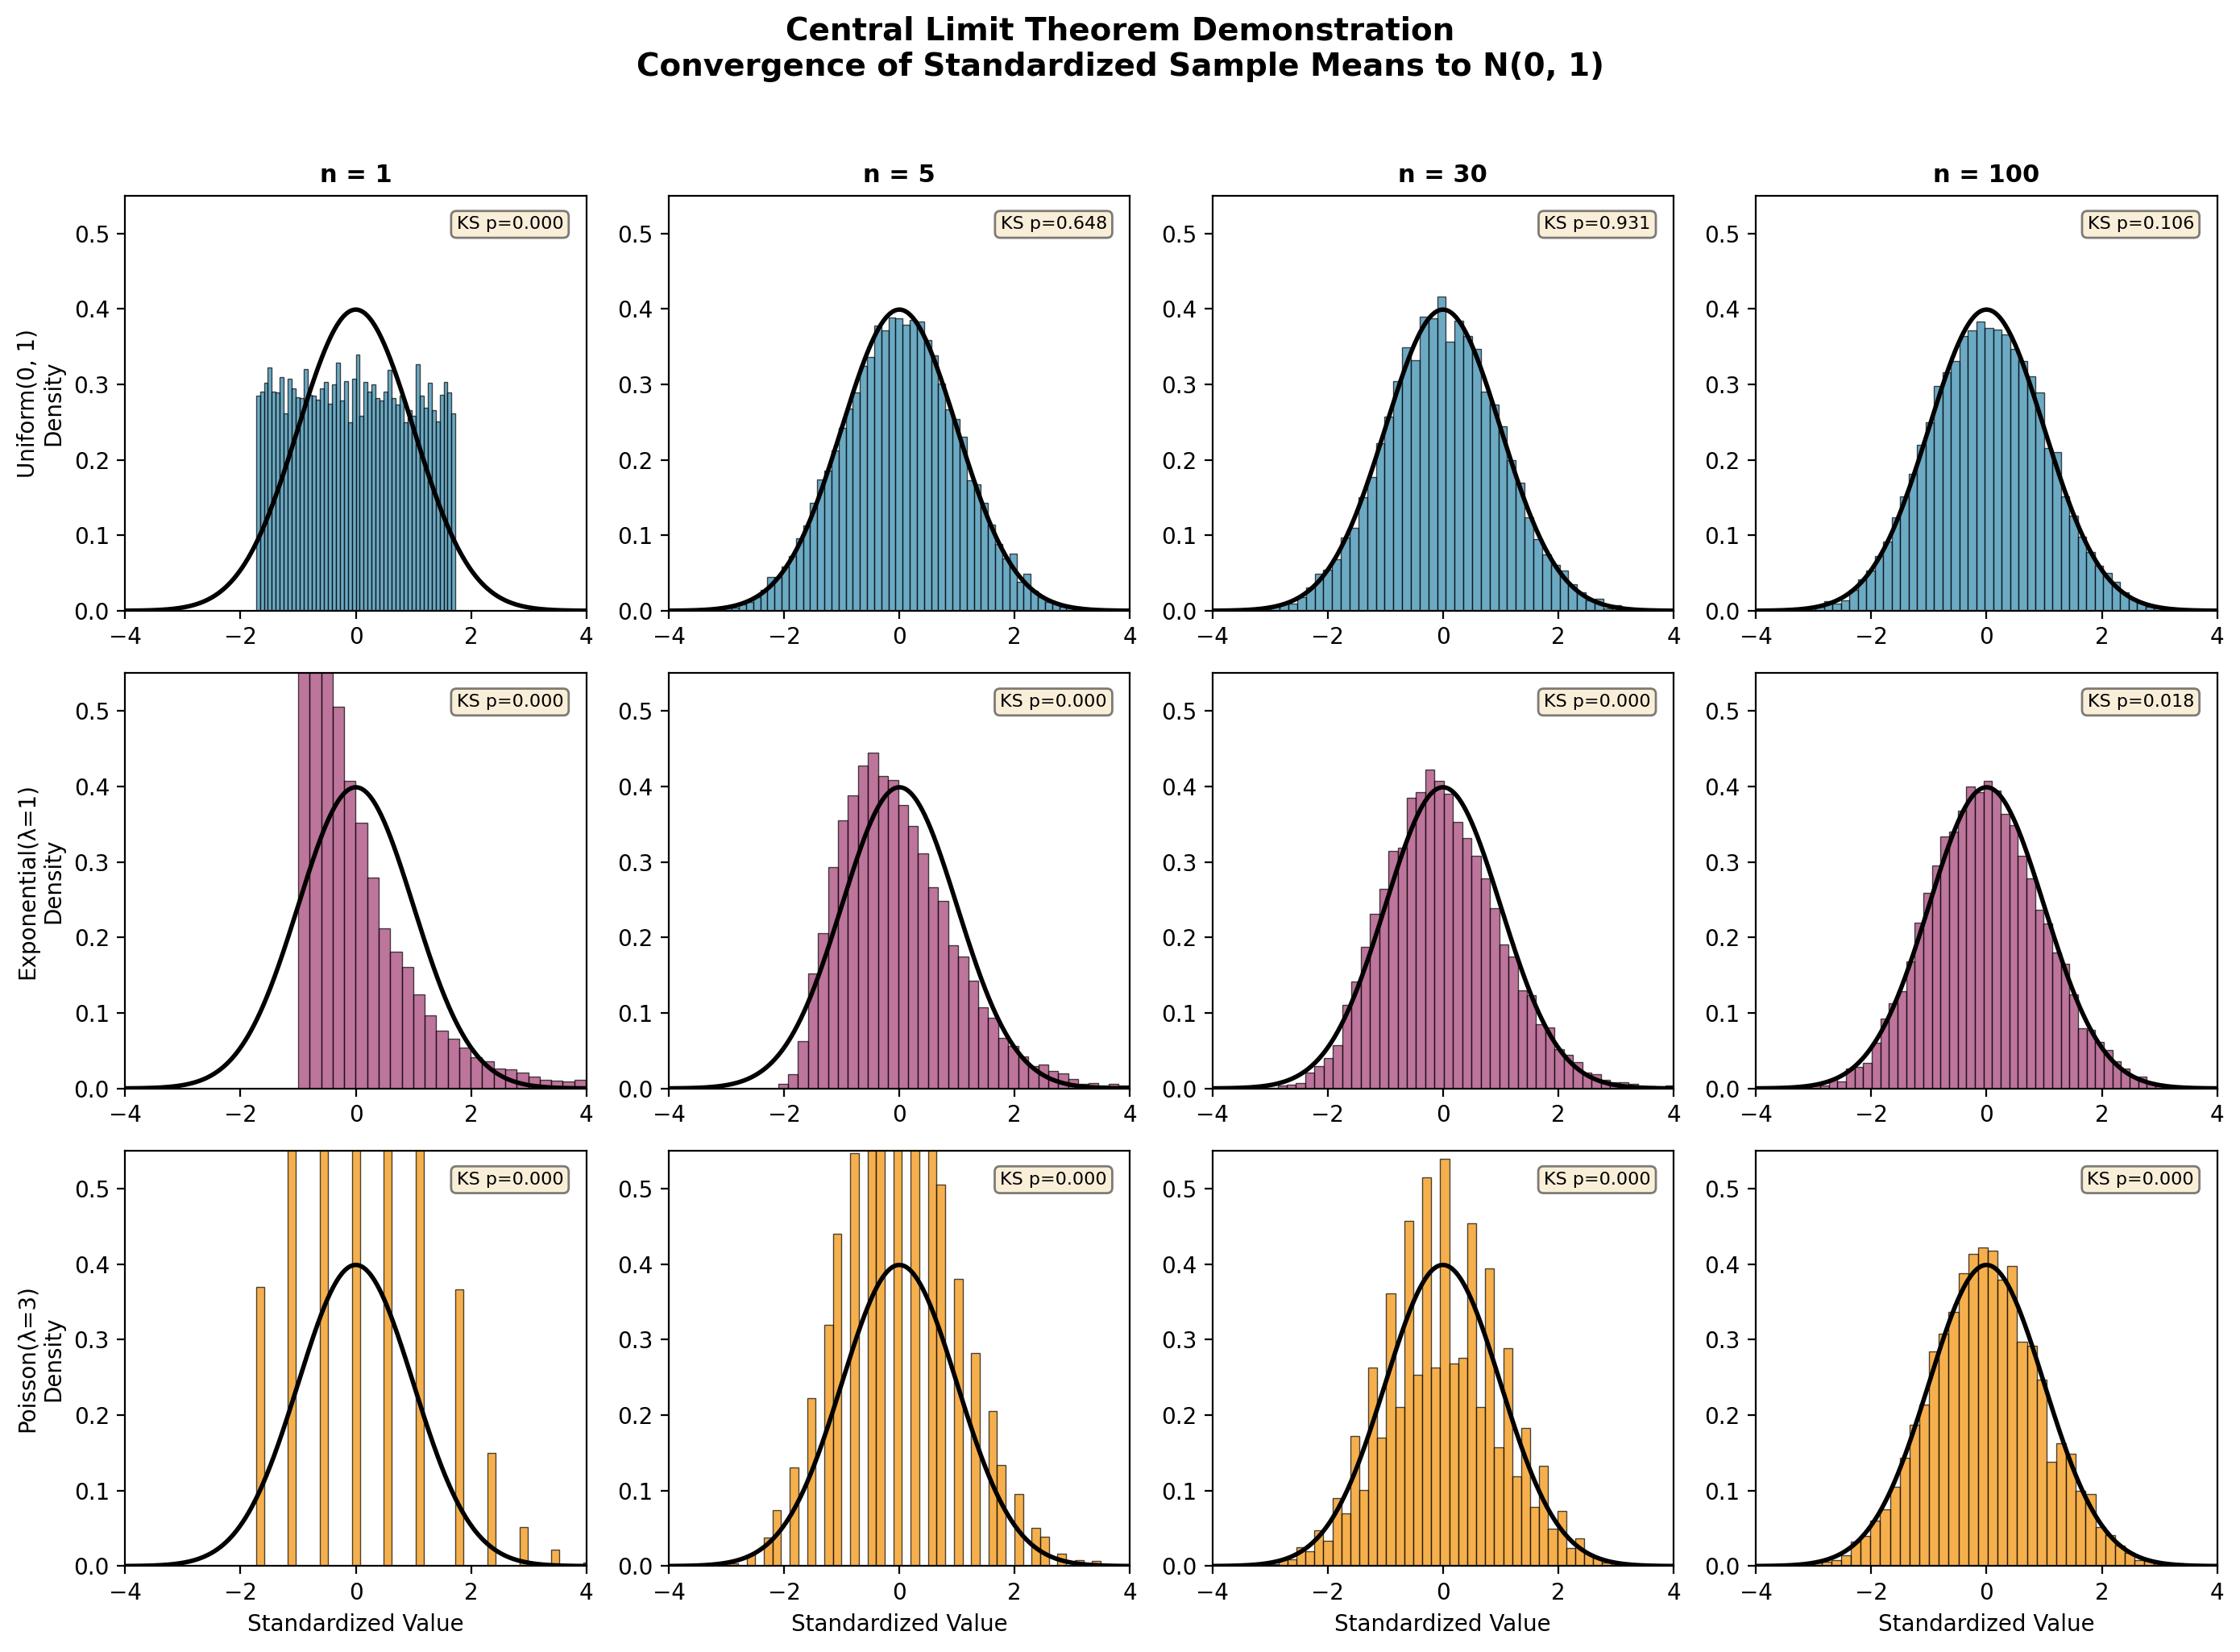


Figure saved to plot.png


In [4]:
# Create comprehensive visualization
fig, axes = plt.subplots(3, 4, figsize=(14, 10))
fig.suptitle('Central Limit Theorem Demonstration\n'
             'Convergence of Standardized Sample Means to N(0, 1)', 
             fontsize=14, fontweight='bold', y=1.02)

# Standard normal for comparison
x_norm = np.linspace(-4, 4, 1000)
y_norm = stats.norm.pdf(x_norm)

colors = ['#2E86AB', '#A23B72', '#F18F01']

for i, (dist_name, results) in enumerate(all_results.items()):
    for j, n in enumerate(sample_sizes):
        ax = axes[i, j]
        
        # Plot histogram of standardized sample means
        standardized = results[n]['standardized']
        ax.hist(standardized, bins=50, density=True, alpha=0.7, 
                color=colors[i], edgecolor='black', linewidth=0.5,
                label=f'Sample means\n(n={n})')
        
        # Overlay standard normal
        ax.plot(x_norm, y_norm, 'k-', linewidth=2, label='N(0, 1)')
        
        # Calculate and display goodness-of-fit
        ks_stat, ks_pval = stats.kstest(standardized, 'norm')
        
        ax.set_xlim(-4, 4)
        ax.set_ylim(0, 0.55)
        
        if i == 0:
            ax.set_title(f'n = {n}', fontsize=11, fontweight='bold')
        
        if j == 0:
            ax.set_ylabel(f'{dist_name}\nDensity', fontsize=10)
        
        if i == 2:
            ax.set_xlabel('Standardized Value', fontsize=10)
        
        # Add KS test p-value
        ax.text(0.95, 0.95, f'KS p={ks_pval:.3f}', 
                transform=ax.transAxes, fontsize=8,
                verticalalignment='top', horizontalalignment='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig('central_limit_theorem_demonstration_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nFigure saved to plot.png")

## Quantitative Analysis: Convergence Metrics

To rigorously assess convergence, we compute several statistical measures:

1. **Kolmogorov-Smirnov (KS) Statistic**: Maximum deviation between empirical and theoretical CDFs
2. **Skewness**: Third standardized moment (should approach 0)
3. **Excess Kurtosis**: Fourth standardized moment minus 3 (should approach 0)

In [5]:
print("="*80)
print("CONVERGENCE ANALYSIS: Central Limit Theorem")
print("="*80)

for dist_name, results in all_results.items():
    print(f"\n{dist_name}")
    print("-" * 60)
    print(f"{'n':>6} {'KS Stat':>10} {'p-value':>10} {'Skewness':>10} {'Ex. Kurt':>10}")
    print("-" * 60)
    
    for n in sample_sizes:
        standardized = results[n]['standardized']
        
        ks_stat, ks_pval = stats.kstest(standardized, 'norm')
        skewness = stats.skew(standardized)
        kurtosis = stats.kurtosis(standardized)  # Excess kurtosis
        
        print(f"{n:>6} {ks_stat:>10.4f} {ks_pval:>10.4f} {skewness:>10.4f} {kurtosis:>10.4f}")

print("\n" + "="*80)
print("Note: For N(0,1), skewness = 0 and excess kurtosis = 0")
print("KS p-value > 0.05 suggests consistency with normal distribution")
print("="*80)

CONVERGENCE ANALYSIS: Central Limit Theorem

Uniform(0, 1)
------------------------------------------------------------
     n    KS Stat    p-value   Skewness   Ex. Kurt
------------------------------------------------------------
     1     0.0635     0.0000     0.0249    -1.1892
     5     0.0074     0.6478     0.0054    -0.2117
    30     0.0054     0.9311     0.0228     0.0116
   100     0.0121     0.1061    -0.0118    -0.1152

Exponential(λ=1)
------------------------------------------------------------
     n    KS Stat    p-value   Skewness   Ex. Kurt
------------------------------------------------------------
     1     0.1587     0.0000     2.0174     5.9976
     5     0.0606     0.0000     0.9125     1.3776
    30     0.0301     0.0000     0.3702     0.2444
   100     0.0153     0.0182     0.1533     0.0207

Poisson(λ=3)
------------------------------------------------------------
     n    KS Stat    p-value   Skewness   Ex. Kurt
-------------------------------------------

## Berry-Esseen Bound

The **Berry-Esseen theorem** provides a quantitative bound on the rate of convergence in the CLT:

$$\sup_{x \in \mathbb{R}} |F_n(x) - \Phi(x)| \leq \frac{C \cdot \rho}{\sigma^3 \sqrt{n}}$$

where:
- $F_n(x)$ is the CDF of the standardized sample mean
- $\Phi(x)$ is the standard normal CDF
- $\rho = \mathbb{E}[|X - \mu|^3]$ is the third absolute central moment
- $C \leq 0.4748$ is a universal constant

This shows that convergence is $\mathcal{O}(1/\sqrt{n})$.

In [6]:
# Demonstrate Berry-Esseen bound for Exponential distribution
# For Exp(1): μ = 1, σ = 1, E[|X-μ|³] = 2

print("\nBerry-Esseen Bound Analysis (Exponential Distribution)")
print("="*60)

C_BE = 0.4748  # Berry-Esseen constant
rho_exp = 2  # Third absolute central moment for Exp(1)
sigma_exp = 1

print(f"{'n':>6} {'Theoretical':>15} {'Empirical KS':>15} {'Ratio':>10}")
print("-" * 60)

for n in sample_sizes:
    # Theoretical Berry-Esseen bound
    be_bound = C_BE * rho_exp / (sigma_exp**3 * np.sqrt(n))
    
    # Empirical KS statistic
    ks_stat, _ = stats.kstest(all_results['Exponential(λ=1)'][n]['standardized'], 'norm')
    
    ratio = ks_stat / be_bound if be_bound > 0 else 0
    
    print(f"{n:>6} {be_bound:>15.4f} {ks_stat:>15.4f} {ratio:>10.4f}")

print("\nNote: Empirical KS should be less than theoretical bound")


Berry-Esseen Bound Analysis (Exponential Distribution)
     n     Theoretical    Empirical KS      Ratio
------------------------------------------------------------
     1          0.9496          0.1587     0.1671
     5          0.4247          0.0606     0.1427
    30          0.1734          0.0301     0.1737
   100          0.0950          0.0153     0.1613

Note: Empirical KS should be less than theoretical bound


## Conclusion

This demonstration confirms the Central Limit Theorem through empirical simulation:

1. **Universality**: All three distributions (Uniform, Exponential, Poisson) show convergence to normality despite their different shapes

2. **Rate of Convergence**: 
   - $n = 1$: Distribution matches original (no convergence)
   - $n = 5$: Beginning of convergence visible
   - $n = 30$: Good approximation to normal ("rule of 30")
   - $n = 100$: Excellent agreement with $\mathcal{N}(0, 1)$

3. **Practical Implications**:
   - Sample means are approximately normal even for small $n$
   - This justifies the widespread use of $t$-tests and confidence intervals
   - The CLT underpins much of classical statistical inference

The CLT remains one of the most powerful tools in statistics, enabling robust inference without requiring knowledge of the underlying population distribution.